# Milestone 1 Phase 0

# i. Perkenalan

Nama    : Ibrahim Hasan

Batch   : FTDS 009

Heroku app URL : https://ibrahim-m1-p0.herokuapp.com/

# Gambaran dataset & Objective

Dataset yang digunakan berasal dari kaggle.com yang berisi data penjualan dari suatu supermarket di Negara Myanmar yang mencakup 3 kota diantaranya Yangon, Naypyitaw, dan Mandalay dari tanggal 1 Januari 2019 sampai dengan 30 Maret 2019.

Objective yang ingin dicapai adalah mengetahui hasil uji hipotesa tentang perbandingan dari rating yang diberikan oleh pelanggan dari setiap kota, apakah diantara ke-3 kota tersebut terdapat perbedaan signifikan atau tidak.

# ii. Import Pustaka

In [102]:
import numpy as np
import pandas as pd
import scipy as sy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.figure_factory as ff

# iii. Data Loading

Mengunggah data yang telah diunduh pada local folder dan dilanjutkan dengan eksplorasi data sederhana.

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Observasi missing value dengan df.info() yang menunjukkan tidak ada missing value pada seluruh kolom.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# iv. Eksplorasi Data

Beberapa hal yang dilakukan pada eksplorasi data adalah sebagai berikut :

- Melakukan grouping untuk melihat mean dari masing-masing rating pada setiap city.
- Slicing berdasarkan City yang ingin dilakukan pengujian hipotesis.

Grouping berdasarkan City untuk melihat masing-masing nilai mean, didapatkan nilai mean rating tertinggi adalah kota Naypyitaw, dan rating terendah adalah Mandalay.

In [78]:
df.groupby("City", sort=False)["Rating"].mean()

City
Yangon       7.027059
Naypyitaw    7.072866
Mandalay     6.818072
Name: Rating, dtype: float64

In [5]:
yangon = df[(df['City'] == 'Yangon')]
yangon.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,340.000000,340.000000
mean,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905e+00,14.874001,7.027059
std,26.132127,2.859876,11.030477,231.640025,220.609547,1.778975e-14,11.030477,1.731345
min,10.080000,1.000000,0.604500,12.694500,12.090000,4.761905e+00,0.604500,4.000000
25%,32.250000,3.000000,6.547125,137.489625,130.942500,4.761905e+00,6.547125,5.600000
50%,53.235000,5.000000,11.468000,240.828000,229.360000,4.761905e+00,11.468000,7.100000
75%,75.095000,8.000000,21.873375,459.340875,437.467500,4.761905e+00,21.873375,8.500000
max,99.830000,10.000000,49.490000,1039.290000,989.800000,4.761905e+00,49.490000,10.000000


In [6]:
mandalay = df[(df['City'] == 'Mandalay')]
mandalay.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,332.000000,332.000000,332.000000,332.000000,332.000000,3.320000e+02,332.000000,332.000000
mean,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905e+00,15.232024,6.818072
std,26.224559,2.896446,11.545122,242.447565,230.902443,1.601134e-14,11.545122,1.713719
min,10.590000,1.000000,0.887500,18.637500,17.750000,4.761905e+00,0.887500,4.000000
25%,33.300000,3.000000,5.711250,119.936250,114.225000,4.761905e+00,5.711250,5.300000
50%,54.850000,5.000000,12.042000,252.882000,240.840000,4.761905e+00,12.042000,6.700000
75%,77.002500,8.000000,22.170750,465.585750,443.415000,4.761905e+00,22.170750,8.200000
max,99.960000,10.000000,48.690000,1022.490000,973.800000,4.761905e+00,48.690000,10.000000


In [7]:
naypyitaw = df[(df['City'] == 'Naypyitaw')]
naypyitaw.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,328.000000,328.000000,328.000000,328.000000,328.000000,3.280000e+02,328.000000,328.000000
mean,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905e+00,16.052367,7.072866
std,27.179799,3.021724,12.531470,263.160870,250.629400,1.512210e-14,12.531470,1.704526
min,10.160000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.767500,3.000000,5.784500,121.474500,115.690000,4.761905e+00,5.784500,5.600000
50%,56.810000,6.000000,12.924750,271.419750,258.495000,4.761905e+00,12.924750,7.100000
75%,81.552500,8.000000,23.607375,495.754875,472.147500,4.761905e+00,23.607375,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


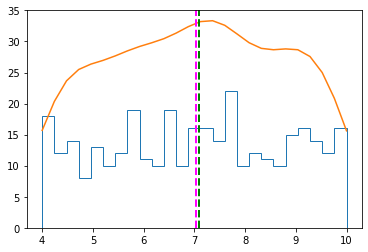

In [8]:
yangon_dist = yangon['Rating']
density = stats.gaussian_kde(yangon_dist)
n, x, _ = plt.hist(yangon_dist, histtype='step', bins=25)  
plt.plot(x, density(x)*2**7.5)
plt.axvline(yangon_dist.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(yangon_dist.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

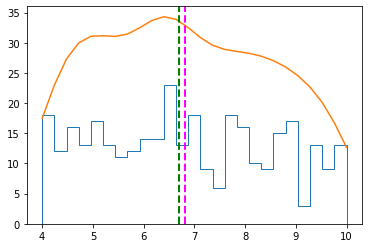

In [9]:
mandalay_dist = mandalay['Rating']
density = stats.gaussian_kde(mandalay_dist)
n, x, _ = plt.hist(mandalay_dist, histtype='step', bins=25)  
plt.plot(x, density(x)*2**7.5)
plt.axvline(mandalay_dist.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(mandalay_dist.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

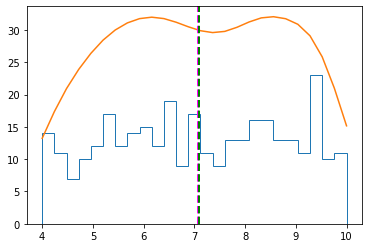

In [10]:
naypyitaw_dist = naypyitaw['Rating']
density = stats.gaussian_kde(naypyitaw_dist)
n, x, _ = plt.hist(naypyitaw_dist, histtype='step', bins=25)  
plt.plot(x, density(x)*2**7.5)
plt.axvline(naypyitaw_dist.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(naypyitaw_dist.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

# v. Measure of Central Tendency

In [11]:
print('Modus Yangon Rating :', str(yangon['Rating'].mode()))
print('Median Yangon Rating :', str(yangon['Rating'].median()))
print('Mean Yangon Rating :', str(yangon['Rating'].mean()))

Modus Yangon Rating : 0    4.2
1    6.6
dtype: float64
Median Yangon Rating : 7.1
Mean Yangon Rating : 7.027058823529413


In [12]:
print('Modus Mandalay Rating :', str(mandalay['Rating'].mode()))
print('Median Mandalay Rating :', str(mandalay['Rating'].median()))
print('Mean Mandalay Rating :', str(mandalay['Rating'].mean()))

Modus Mandalay Rating : 0    5.1
1    6.5
2    8.9
dtype: float64
Median Mandalay Rating : 6.7
Mean Mandalay Rating : 6.8180722891566266


In [79]:
print('Modus Naypyitaw Rating :', str(naypyitaw['Rating'].mode()))
print('Median Naypyitaw Rating :', str(naypyitaw['Rating'].median()))
print('Mean Naypyitaw Rating :', str(naypyitaw['Rating'].mean()))

Modus Naypyitaw Rating : 0    6.0
1    9.5
dtype: float64
Median Naypyitaw Rating : 7.1
Mean Naypyitaw Rating : 7.072865853658538


# v.i. Measure of Variance

Measure of Variance - Range

In [13]:
numcols = ['Rating']
for col in numcols:
    print(yangon[col].name, ' range untuk Yangon Rating : ', str(yangon[col].max() - yangon[col].min()))

Rating  range untuk Yangon Rating :  6.0


In [14]:
numcols = ['Rating']
for col in numcols:
    print(mandalay[col].name, ' range untuk Mandalay Rating : ', str(mandalay[col].max() - mandalay[col].min()))

Rating  range untuk Mandalay Rating :  6.0


In [80]:
numcols = ['Rating']
for col in numcols:
    print(naypyitaw[col].name, ' range untuk Naypyitaw Rating : ', str(naypyitaw[col].max() - naypyitaw[col].min()))

Rating  range untuk Naypyitaw Rating :  6.0


Measure of Variance - Variance

In [15]:
print('Nilai Variance Yangon rating :', yangon['Rating'].var())

Nilai Variance Yangon rating : 2.997554745792124


In [16]:
print('Nilai Variance Mandalay rating :', mandalay['Rating'].var())

Nilai Variance Mandalay rating : 2.9368325264805457


In [81]:
print('Nilai Variance Naypyitaw rating :', naypyitaw['Rating'].var())

Nilai Variance Naypyitaw rating : 2.90540827552771


Measure of Variance - Standard Deviation

In [17]:
print('Standar deviation Yangon rating :', yangon['Rating'].std())

Standar deviation Yangon rating : 1.7313447795838135


In [18]:
print('Standar deviation Mandalay rating :', mandalay['Rating'].std())

Standar deviation Mandalay rating : 1.7137189169990934


In [83]:
print('Standar deviation Naypyitaw rating :', naypyitaw['Rating'].std())

Standar deviation Naypyitaw rating : 1.7045258213144527


# vi. Hypothesis testing

Pengujian hipotesis yang digunakan adalah ANOVA test dengan 3 sample yaitu mean rating dari masing-masing kota, dengan objective mencari tahu apakah mean rating dari kota tersebut apakah memiliki perbedaan yang signifikan, atau tidak berbeda signifikan.

H0 : Mean of Yangon rating == Mean of Mandalay rating.

H1 : Mean of Yangon rating != Mean of Mandalay rating.

In [95]:
total_yangon = df[df['City'] == 'Yangon']['Rating']
total_yangon.mean()

7.027058823529413

In [97]:
total_mandalay = df[df['City'] == 'Mandalay']['Rating']
total_mandalay.mean()

6.8180722891566266

In [98]:
total_naypyitaw = df[df['City'] == 'Naypyitaw']['Rating']
total_naypyitaw.mean()

7.072865853658538

In [100]:
f_stat, p_value = stats.f_oneway(total_yangon, total_mandalay, total_naypyitaw)

print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.1163469684078779
t-statistics: 1.5723263581567595


# vii. Visualisasi dengan Boxplot untuk melihat persebaran sampel rating antara masing-masing kota.

In [76]:
fig_box = px.box(df, x="City", y="Rating")
fig_box.show()

# vii. Pengambilan Kesimpulan

Atas pengujian hipotesis yang menghasilkan P-value 0.116 yang lebih besar dari critical value 0.05, maka kesimpulan uji hipotesis adalah gagal menolak H0.

Kesimpulan tersebut dapat diartikan secara statistik, mean dari rating supermarket di kota Yangon, Mandalay, dan Naypyitaw tidak berbeda signifikan antara ketiganya.